In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import tensorflow as tf
import tqdm
import numpy as np

import dataset
from server import Server
from clients import *
from archs import *
import archs
import matplotlib.pyplot as plt


xpriv, _ = dataset.load_mnist()

# Setup Attack

In [3]:
# choose attacker's target class
target_class = 1
# number of honest clients
NHC = 10

batch_size = 256
f = make_f()
ff = make_ff()
G = make_generator()
clients = [
    BadClient(f, ff, G, batch_size, target_class),
]
for i in range(NHC):
    clients += [Client(f, ff)]

# Run attack

In [4]:
splitnn = Server(make_s, clients, xpriv, batch_size)
log, log_bad = splitnn(5000)

100%|██████████| 5000/5000 [11:16<00:00,  7.39it/s]


# Sample from the trained generator $G$

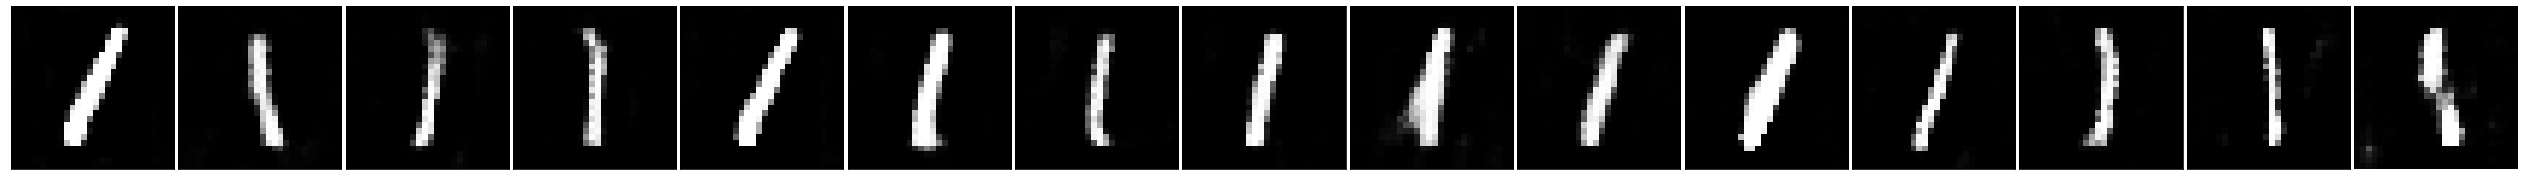

In [5]:
def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i].reshape(28, 28)), cmap='gray');  
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
        
    return fig

x = clients[0].generate().numpy()[:15]
fig = plot(x);